In [19]:
##### Dependencies and Setup
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt

In [20]:
# Read in csv
file1 = "../resources/IPEDS_data.csv"
univ_stats = pd.read_csv(file1)
univ_stats.head()


,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,<<<<<<< HEAD
ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,Offers One but less than two years certificate,Offers Associate's degree,Offers Two but less than 4 years certificate,Offers Bachelor's degree,Offers Postbaccalaureate certificate,Offers Master's degree,Offers Post-master's certificate,Offers Doctor's degree - research/scholarship,Offers Doctor's degree - professional practice,Offers Doctor's degree - other,Offers Other degree,Applicants total,Admissions total,Enrolled total,Percent of freshmen submitting SAT scores,Percent of freshmen submitting ACT scores,SAT Critical Reading 25th percentile score,SAT Critical Reading 75th percentile score,SAT Math 25th percentile score,SAT Math 75th percentile score,SAT Writing 25th percentile score,SAT Writing 75th percentile score,ACT Composite 25th percentile score,ACT Composite 75th percentile score,"Estimated enrollment, total","Estimated enrollment, full time","Estimated enrollment, part time","Estimated undergraduate enrollment, total","Estimated undergraduate enrollment, full time","Estimated undergraduate enrollment, part time","Estimated freshman undergraduate enrollment, total","Estimated freshman enrollment, full time","Estimated freshman enrollment, part time","Estimated graduate enrollment, total","Estimated graduate enrollment, full time","Estimated graduate enrollment, part time",Associate's degrees awarded,Bachelor's degrees awarded,Master's degrees awarded,Doctor's degrese - research/scholarship awarded,Doctor's degrees - professional practice awarded,Doctor's degrees - other awarded,Certificates of less than 1-year awarded,Certificates of 1 but less than 2-years awarded,Certificates of 2 but less than 4-years awarded,Postbaccalaureate certificates awarded,Post-master's certificates awarded,Number of students receiving an Associate's degree,Number of students receiving a Bachelor's degree,Number of students receiving a Master's degree,Number of students receiving a Doctor's degree,Number of students receiving a certificate of less than 1-year,Number of students receiving a certificate of 1 but less than 4-years,Number of students receiving a Postbaccalaureate or Post-master's certificate,Percent admitted - total,Admissions yield - total,"Tuition and fees, 2010-11","Tuition and fees, 2011-12","Tuition and fees, 2012-13","Tuition and fees, 2013-14",Total price for in-state students living on campus 2013-14,Total price for out-of-state students living on campus 2013-14,State abbreviation,FIPS state code,Geographic region,Sector of institution,Level of institution,Control of institution,Historically Black College or University,Tribal college,Degree of urbanization (Urban-centric locale),Carnegie Classification 2010: Basic,Total enrollment,Full-time enrollment,Part-time enrollment,Undergraduate enrollment,Graduate enrollment,Full-time undergraduate enrollment,Part-time undergraduate enrollment,Percent of total enrollment that are American Indian or Alaska Native,Percent of total enrollment that are Asian,Percent of total enrollment that are Black or African American,Percent of total enrollment that are Hispanic/Latino,Percent of total enrollment that are Native Hawaiian or Other Pacific Islander,Percent of total enrollment that are White,Percent of total enrollment that are two or more races,Percent of total enrollment that are Race/ethnicity unknown,Percent of total enrollment that are Nonresident Alien,Percent of total enrollment that are Asian/Native Hawaiian/Pacific Islander,Percent of total enrollment that are women,Percent of undergraduate enrollment that are American Indian or Alaska Native,Percent of undergraduate enrollment that are Asian,Percent of undergraduate enrollment tha

In [18]:
my_list = list(univ_stats)
my_list

['<<<<<<< HEAD']

In [6]:
# Selecting the relevant columns for the data frame
HBCU_ar = univ_stats.filter(['Name', 'Historically Black College or University', 'Applicants total', 'Admissions total'], axis=1)

# Deleting all rows that did not pertain the value Yes under the Historically Black College or University column
HBCU_filtered = HBCU_ar[HBCU_ar['Historically Black College or University'] == 'Yes']

# Dropped all rows that contained NaN values
HBCU_filtered1 = HBCU_filtered.dropna()

# Added the new column Acceptance rate and formatted the output by percentage 
HBCU_filtered1['Acceptance rate'] = ((HBCU_filtered1['Admissions total']/HBCU_filtered1['Applicants total']) * 100).round(2)

# Set the column name as the index
HBCU_filtered1.set_index('Name')


KeyError: 'Historically Black College or University'

In [7]:
# Selecting the relevant columns for the data frame
HBCU_er = univ_stats.filter(['Name', 'Historically Black College or University', 'Enrolled total', 'Admissions total'], axis=1)

# Deleting all rows that did not pertain the value Yes under the Historically Black College or University column
HBCU_er_filtered = HBCU_er[HBCU_er['Historically Black College or University'] == 'Yes']

# Dropped all rows that contained NaN values
HBCU_filtered2 = HBCU_er_filtered.dropna()

# Added the new column Acceptance rate and formatted the output by percentage 
HBCU_filtered2['Enrollment rate'] = ((HBCU_filtered2['Enrolled total']/HBCU_filtered2['Admissions total']) * 100).round(2)

# Set the column name as the index
HBCU_filtered2.set_index('Name')


KeyError: 'Historically Black College or University'

In [8]:
HBCU_tests = univ_stats.filter(['Name', 'Historically Black College or University', 'Tuition and fees, 2013-14', 'SAT Critical Reading 25th percentile score', 'SAT Critical Reading 75th percentile score',
                                'SAT Math 25th percentile score', 'SAT Math 75th percentile score',
                                'ACT Composite 25th percentile score,' 'ACT Composite 75th percentile score'], axis=1)

HBCU_tests_filtered = HBCU_tests[HBCU_tests['Historically Black College or University'] == 'Yes']

# Dropped all rows that contained NaN values
HBCU_tests_filtered1 = HBCU_tests_filtered.dropna()

HBCU_tests_filtered1

KeyError: 'Historically Black College or University'

In [9]:
high_scores = HBCU_tests_filtered1.loc[(HBCU_tests_filtered1['SAT Critical Reading 75th percentile score'] >= 520) & (HBCU_tests_filtered1['SAT Math 75th percentile score'] >= 520) ]

high_scores['Acceptance rate'] = HBCU_filtered1['Acceptance rate']
high_scores['Enrollment rate'] = HBCU_filtered2['Enrollment rate']

top_HBCUs = high_scores.filter(['Name', 'Acceptance rate', 'Enrollment rate'])

top_HBCUs.set_index('Name')

NameError: name 'HBCU_tests_filtered1' is not defined

In [10]:
THBCU_avg_accpt = top_HBCUs['Acceptance rate'].mean()
THBCU_avg_accpt


NameError: name 'top_HBCUs' is not defined

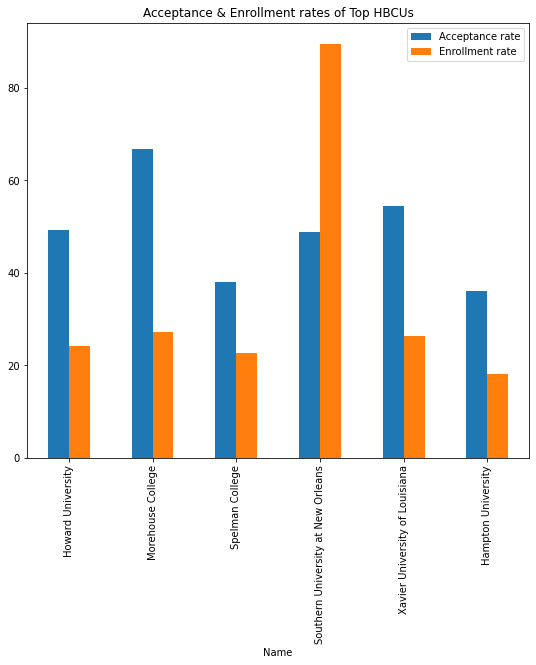

In [9]:
high_scores.plot(x ='Name', y=['Acceptance rate', 'Enrollment rate'], kind='bar', figsize=(9,8), title="Acceptance & Enrollment rates of Top HBCUs")
plt.show()


In [33]:
std_tests = univ_stats.filter(['Name', 'SAT Critical Reading 25th percentile score', 'SAT Critical Reading 75th percentile score',
                                'SAT Math 25th percentile score', 'SAT Math 75th percentile score',
                                'ACT Composite 25th percentile score,' 'ACT Composite 75th percentile score'], axis=1)

# Dropped all rows that contained NaN values
std_tests_filtered = std_tests.dropna()

high_std_scores = std_tests_filtered.loc[(std_tests_filtered['SAT Critical Reading 75th percentile score'] >= 780) & (std_tests_filtered['SAT Math 75th percentile score'] >= 780)]

high_std_scores['Acceptance rate'] = ((univ_stats['Admissions total']/univ_stats['Applicants total']) * 100).round(2)
high_std_scores['Enrollment rate'] = ((univ_stats['Enrolled total']/univ_stats['Admissions total']) * 100).round(2)

top_univ = high_std_scores.filter(['Name', 'Acceptance rate', 'Enrollment rate'])
top_univ.set_index('Name')


<ipython-input-33-fa52e7d8528f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_std_scores['Acceptance rate'] = ((univ_stats['Admissions total']/univ_stats['Applicants total']) * 100).round(2)
<ipython-input-33-fa52e7d8528f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_std_scores['Enrollment rate'] = ((univ_stats['Enrolled total']/univ_stats['Admissions total']) * 100).round(2)


,Acceptance rate,Enrollment rate
Name,,
California Institute of Technology,10.55,42.64
Yale University,7.05,66.37
University of Chicago,8.81,53.41
Harvard University,5.84,81.05
Williams College,17.02,45.47
Dartmouth College,9.78,48.58
Princeton University,7.41,65.46
Columbia University in the City of New York,7.42,59.91
Vanderbilt University,12.74,40.70


In [17]:
TUniv_avg_accpt = top_univ['Acceptance rate'].mean()
TUniv_avg_accpt


9.230999999999998

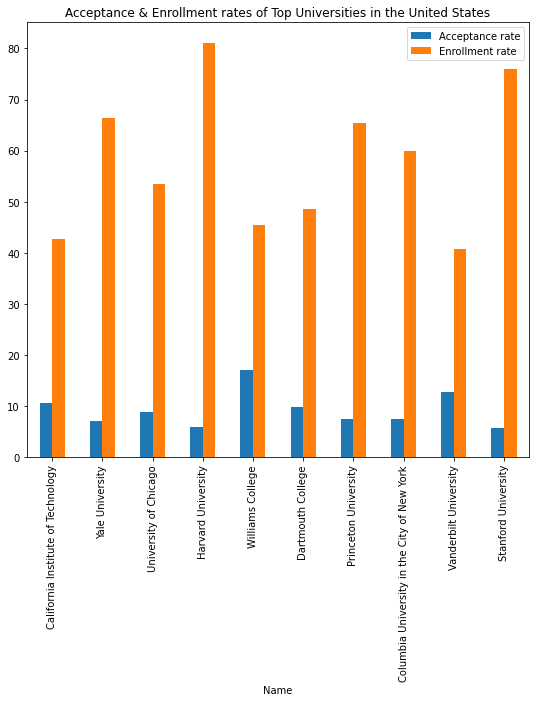

In [11]:
top_univ.plot(x ='Name', y=['Acceptance rate', 'Enrollment rate'], kind='bar', figsize=(9,8), title="Acceptance & Enrollment rates of Top Universities in the United States")
plt.show()


In [32]:
ga_tests = univ_stats.filter(['Name', 'State abbreviation', 'SAT Critical Reading 25th percentile score', 'SAT Critical Reading 75th percentile score',
                                'SAT Math 25th percentile score', 'SAT Math 75th percentile score',
                                'ACT Composite 25th percentile score,' 'ACT Composite 75th percentile score'], axis=1)

# Dropped all rows that contained NaN values
ga_tests_filtered = ga_tests.dropna()

ga_std_scores = ga_tests_filtered.loc[(ga_tests_filtered['SAT Critical Reading 75th percentile score'] >= 600) & (ga_tests_filtered['SAT Math 75th percentile score'] >= 600)]

ga_std_scores['Acceptance rate'] = ((univ_stats['Admissions total']/univ_stats['Applicants total']) * 100).round(2)
ga_std_scores['Enrollment rate'] = ((univ_stats['Enrolled total']/univ_stats['Admissions total']) * 100).round(2)
                                                                
st = ga_std_scores.groupby('State abbreviation')
sr = st.get_group('Georgia')
sr1 = sr.filter(['Name', 'Acceptance rate', 'Enrollment rate'])
sr1.set_index('Name')

<ipython-input-32-ce45107817f4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ga_std_scores['Acceptance rate'] = ((univ_stats['Admissions total']/univ_stats['Applicants total']) * 100).round(2)
<ipython-input-32-ce45107817f4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ga_std_scores['Enrollment rate'] = ((univ_stats['Enrolled total']/univ_stats['Admissions total']) * 100).round(2)


,Acceptance rate,Enrollment rate
Name,,
Berry College,60.32,28.56
Covenant College,57.04,41.61
Emory University,26.33,29.62
Georgia Institute of Technology-Main Campus,54.93,37.84
Georgia College and State University,67.98,50.54
University of Georgia,56.08,47.68
Mercer University,69.00,27.31
Oglethorpe University,55.76,11.49
Southern Polytechnic State University,77.98,60.52


In [23]:
Tsr1_avg_accpt = sr1['Acceptance rate'].mean()
Tsr1_avg_accpt


58.379999999999995

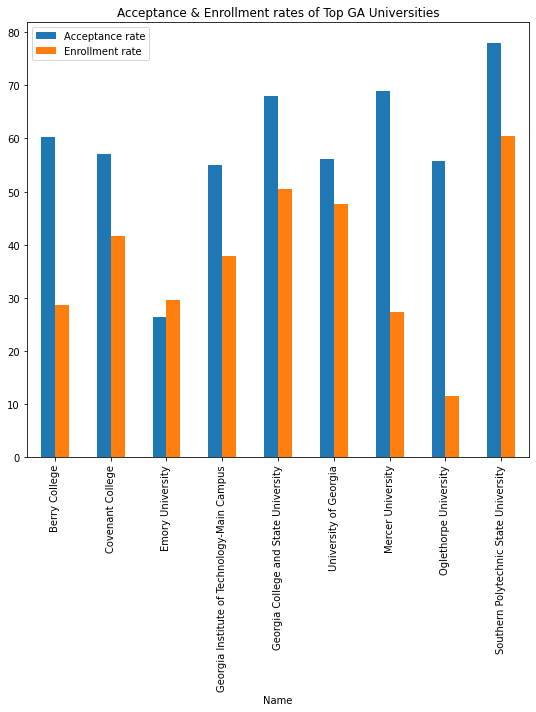

In [31]:
sr1.plot(x ='Name', y=['Acceptance rate', 'Enrollment rate'], kind='bar', figsize=(9,8), title="Acceptance & Enrollment rates of Top GA Universities")
plt.show()
                       

In [50]:
# Selecting the relevant columns for the data frame
tuition = univ_stats.filter(['Name', 'Tuition and fees, 2013-14'], axis=1)

# # Deleting all rows that did not pertain the value Yes under the Historically Black College or University column
# HBCU_er_filtered = HBCU_er[HBCU_er['Historically Black College or University'] == 'Yes']

# # Dropped all rows that contained NaN values
tuition1 = tuition.dropna()

tuition1.sort_values('Tuition and fees, 2013-14', axis=0, ascending = True, inplace = True)

# Added the new column Acceptance rate and formatted the output by percentage 
tuition1['Enrollment rate'] = ((univ_stats['Enrolled total']/univ_stats['Admissions total']) * 100).round(2)

# Set the column name as the index
tuition1.set_index('Name')
tuition1.tail(10)

<ipython-input-50-1bf4466bedad>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tuition1.sort_values('Tuition and fees, 2013-14', axis=0, ascending = True, inplace = True)
<ipython-input-50-1bf4466bedad>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tuition1['Enrollment rate'] = ((univ_stats['Enrolled total']/univ_stats['Admissions total']) * 100).round(2)


,Name,"Tuition and fees, 2013-14",Enrollment rate
1068,Bucknell University,46902.0,39.79
477,Tulane University of Louisiana,46930.0,20.21
177,Wesleyan University,47244.0,35.78
188,George Washington University,47343.0,33.17
176,Trinity College,47510.0,24.84
289,University of Chicago,47514.0,53.41
1072,Carnegie Mellon University,47642.0,29.96
897,Vassar College,47890.0,36.35
858,Sarah Lawrence College,48696.0,25.77
793,Columbia University in the City of New York,49138.0,59.91


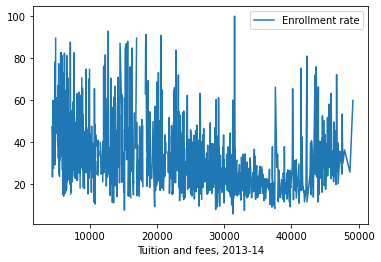

In [51]:
tuition1.plot(x='Tuition and fees, 2013-14', y='Enrollment rate')

In [2]:
ax1 = tuition1.plot.scatter(x='Tuition and fees, 2013-14',
                      y='Enrollment rate',
                      c='DarkBlue')
              

NameError: name 'tuition1' is not defined